# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [9]:
def generate_examples(num=1_000):
    W = [-1.0, -3.0]
    b = 1.0

    W = np.reshape(W, (2, 1))
    X = np.random.randn(num, 2)

    y = b + X @ W + np.random.randn()
    y = np.reshape(y, (num, 1))

    return X, y

In [10]:
X, y = generate_examples()

In [11]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [12]:
print(X[0], y[0])

[1.59631264 1.47506367] [-5.86234996]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [13]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [14]:
model = Model(2)
print(model.W)
print(model.b)

[[0.31524   ]
 [0.78707373]]
0.857921259338052


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [15]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + X @ self.W
        return y_hat

In [17]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)
print(y_hat[0])

(1000, 1)
[-1.15117489]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [18]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        loss = 1 / (2 * m) * np.sum(np.square(y_hat - y_true))
        return loss

In [19]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [20]:
loss

5.436274084269512

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [21]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1 / m) * np.sum(y_hat - y_true)
        dW = (1 / m) * np.sum((y_hat - y_true).T @ X, axis=0)
        return dW, db

In [22]:
model = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)
dW, db = model.backward_pass(X, y, y_hat)

In [23]:
print(dW, db)

[1.08184655 4.5522705 ] -0.5084732639968754


# Task 7: Update Parameters

In [24]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W -= lr * np.reshape(dW, (self.num_features, 1))
        self.b -= db

# Task 8: Training Loop

Gradient Descent:

1. Find gradient of loss with respect to trainable parameters.
2. Update the trainable parameters using the gradients.
3. Compute predictions using current values of the parameters.
4. Compute the loss between predictions and true values.

In [42]:
class Model(Model):
    def train(self, X_train, y_train, epochs, lr):
        losses = []
        for i in range(epochs):
            y_hat = self.forward_pass(X_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(X_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i % int(epochs / 10) == 0:
                print(f"Epoch: {i}, Loss: {loss:.4f}")
        return losses

In [43]:
model = Model(2)

In [44]:
X_train, y_train = generate_examples()

In [45]:
losses = model.train(X_train, y_train, 1000, 3e-3)

Epoch: 0, Loss: 5.4134
Epoch: 100, Loss: 2.5891
Epoch: 200, Loss: 1.4935
Epoch: 300, Loss: 0.8615
Epoch: 400, Loss: 0.4969
Epoch: 500, Loss: 0.2867
Epoch: 600, Loss: 0.1654
Epoch: 700, Loss: 0.0954
Epoch: 800, Loss: 0.0550
Epoch: 900, Loss: 0.0317


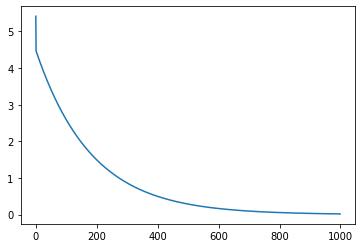

In [46]:
plt.plot(losses);

# Task 9: Predictions

In [47]:
X_test, y_test = generate_examples(500)

print(X_test.shape, y_test.shape)

(500, 2) (500, 1)


In [48]:
y_pred_untrained_model = Model(2).forward_pass(X_test)
y_pred = model.forward_pass(X_test)

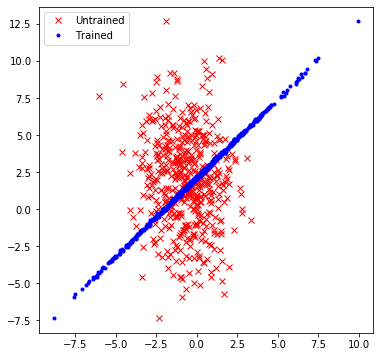

In [49]:
plt.figure(figsize=(6, 6))
plt.plot(y_pred_untrained_model, y_test, "rx", label="Untrained")
plt.plot(y_pred, y_test, "b.", label="Trained")
plt.legend()
plt.xlabel("Predictions")